In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [4]:
path='./kvasir-dataset-v2'

In [5]:
generator=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
    )

In [6]:
train_data = generator.flow_from_directory(path,
                                    target_size=(224,224),
                                    batch_size=32,
                                    class_mode='categorical',
                                    color_mode='rgb',
                                    subset='training',
                                    shuffle=True)

test_data = generator.flow_from_directory(path,
                                    target_size=(224,224),
                                    batch_size=32,
                                    class_mode='categorical',
                                    color_mode='rgb',
                                    subset='validation',
                                    shuffle=True)

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [7]:
classes=train_data.class_indices
classes

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [8]:
labels = {v: k for k, v in classes.items()}
print(labels)

{0: 'dyed-lifted-polyps', 1: 'dyed-resection-margins', 2: 'esophagitis', 3: 'normal-cecum', 4: 'normal-pylorus', 5: 'normal-z-line', 6: 'polyps', 7: 'ulcerative-colitis'}


In [9]:
def show_lbl(x):
    return labels[x.argmax()]

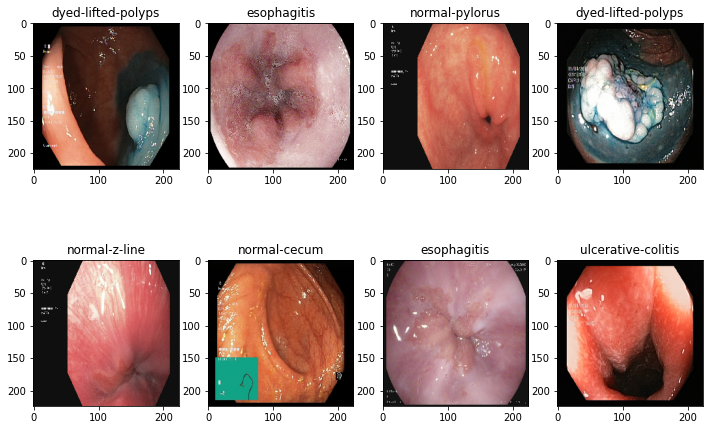

In [10]:
img,lbl=next(train_data)
plt.figure(figsize=(12,8))
i=1
while i < 8:
    plt.subplot(2,4,i)
    plt.imshow(img[i-1])
    plt.title(str(show_lbl(lbl[i-1])))

    plt.subplot(2,4,i+1)
    plt.imshow(img[i])
    plt.title(str(show_lbl(lbl[i])))
    i+=2

In [11]:
ResNet=tf.keras.applications.ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)
ResNet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [12]:
x=Flatten()(ResNet.layers[-1].output)
x=Dense(128 , activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(64 , activation='relu')(x)
x=Dense(8 , activation='softmax')(x)

In [13]:
model = Model(inputs=ResNet.inputs, outputs=x)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [16]:
model.fit(train_data,epochs=40,verbose=2)

Epoch 1/40
200/200 - 135s - loss: 1.3881 - accuracy: 0.5984 - 135s/epoch - 673ms/step
Epoch 2/40
200/200 - 118s - loss: 0.6401 - accuracy: 0.7486 - 118s/epoch - 589ms/step
Epoch 3/40
200/200 - 117s - loss: 0.5718 - accuracy: 0.7883 - 117s/epoch - 586ms/step
Epoch 4/40
200/200 - 116s - loss: 0.4753 - accuracy: 0.8227 - 116s/epoch - 579ms/step
Epoch 5/40
200/200 - 116s - loss: 0.3852 - accuracy: 0.8486 - 116s/epoch - 580ms/step
Epoch 6/40
200/200 - 117s - loss: 0.3539 - accuracy: 0.8606 - 117s/epoch - 583ms/step
Epoch 7/40
200/200 - 116s - loss: 0.3392 - accuracy: 0.8631 - 116s/epoch - 580ms/step
Epoch 8/40
200/200 - 115s - loss: 0.2735 - accuracy: 0.8903 - 115s/epoch - 577ms/step
Epoch 9/40
200/200 - 116s - loss: 0.2655 - accuracy: 0.8906 - 116s/epoch - 578ms/step
Epoch 10/40
200/200 - 116s - loss: 0.2574 - accuracy: 0.8956 - 116s/epoch - 581ms/step
Epoch 11/40
200/200 - 116s - loss: 0.2348 - accuracy: 0.9050 - 116s/epoch - 580ms/step
Epoch 12/40
200/200 - 116s - loss: 0.2084 - accuracy

In [17]:
model.evaluate(test_data)

50/50 [==============================] - 26s 507ms/step - loss: 1.3110 - accuracy: 0.7031


[1.3110153675079346, 0.703125]

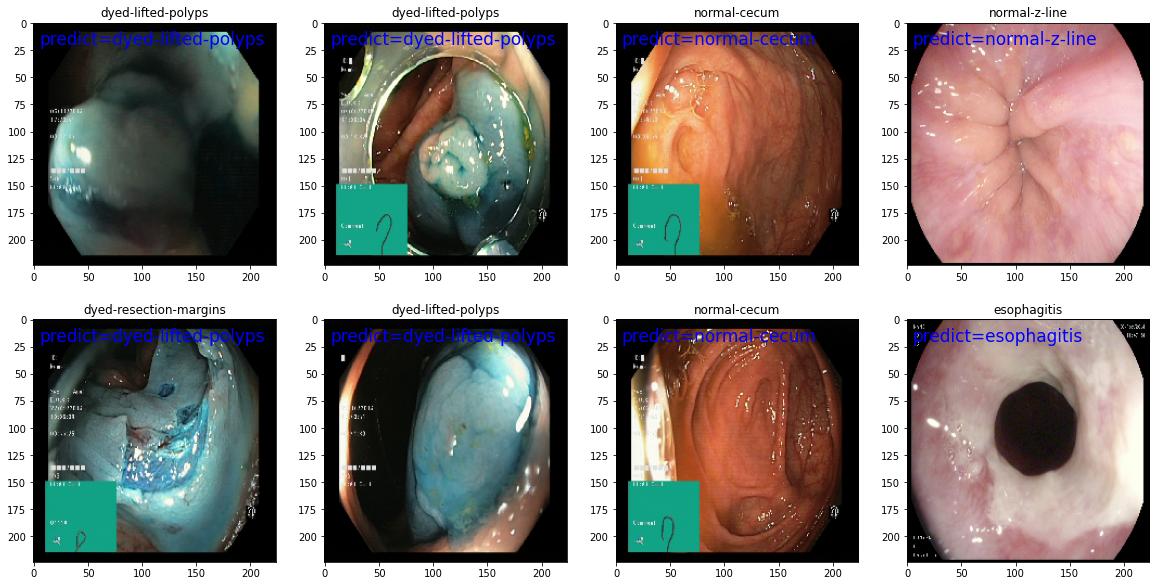

In [20]:
img,lbl=next(test_data)
plt.figure(figsize=(20,10))
i=1
while i < 8:
    plt.subplot(2,4,i)
    plt.imshow(img[i-1])
    pred=model.predict(img)[i-1]
    plt.title(str(show_lbl(lbl[i-1])))
    txt='predict='+str(show_lbl(pred))
    plt.text(5,20,txt,color='b',fontsize=17)

    plt.subplot(2,4,i+1)
    pred=model.predict(img)[i]
    plt.imshow(img[i])
    plt.title(str(show_lbl(lbl[i])))
    txt='predict='+str(show_lbl(pred))
    plt.text(5,20,txt,color='b',fontsize=17)
    i+=2